# Lab 6

# Problem 1

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pickle
import pandas as pd
import random

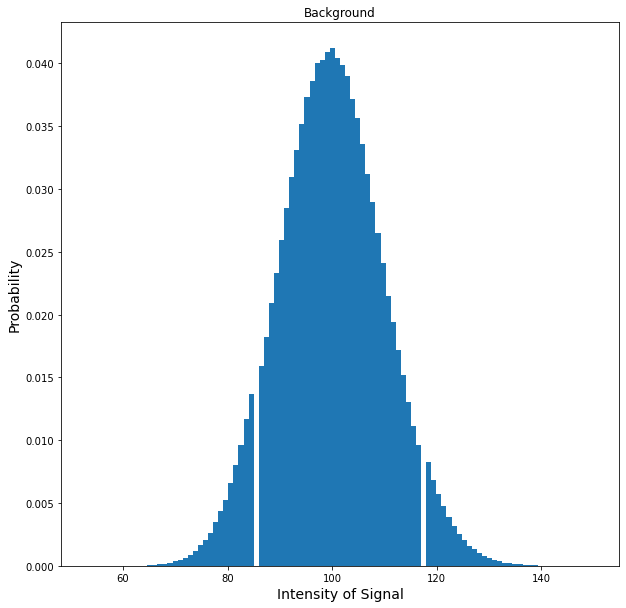

5 sigma value is 154.0.


In [2]:
bkgd = stats.poisson.rvs(100, loc = 0, size = 1000000)
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

ax.hist(bkgd, density = True, bins = 100)
ax.set_title("Background")
ax.set_xlabel("Intensity of Signal", fontsize = 14)
ax.set_ylabel("Probability", fontsize = 14)
plt.show()

prob5sigma = stats.norm.cdf(5, loc = 0, scale = 1)
sig_val = stats.poisson.ppf(prob5sigma, 100, loc = 0)
print("5 sigma value is " + str(sig_val) + ".")

The above plot is the background used for this lab, a Poisson with a mean of 100. The 5 sigma value for this is 154 (obtained from a ppf of the Poisson function). The gaps in the graph (if present, depends on what the random distribution ends up being) just come from the binning of the data.

# Problem 2

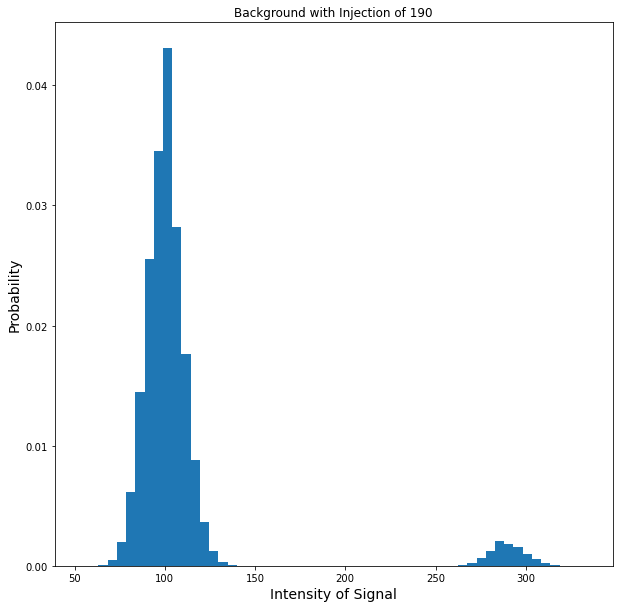

In [3]:
fig, ax = plt.subplots(1, 1, figsize = (10,10))

prob8sigma = stats.norm.cdf(8, loc = 0, scale = 1)
sig8 = stats.poisson.ppf(prob8sigma, 100, loc = 0)

data = bkgd

inject = np.zeros(1000000)
for i in range(50000):
    inject[random.randint(0, 1000000)] = sig8

data = data + inject
    
ax.hist(data, bins = 55, density = True)
ax.set_title("Background with Injection of 190")
ax.set_xlabel("Intensity of Signal", fontsize = 14)
ax.set_ylabel("Probability", fontsize = 14)
plt.show()

Above is a plot of the background, with 50,000 signals of 190 injected into it. This looks like a Poisson at low values, but also has a (relatively) large probability for some values way above the mean, so it isn't really a Poisson. It also is not symmetric, as a large mean Poisson should be. The upper "bump" is a Poisson distribution around 290 (mean of the background + injected strength). This is because as you inject 190 into the background, some values will be lower than the mean and some higher, so you get the same type of distribution, but with a shifted mean. This is saying there is a large chance to observe a high brightness even if the mean is 100, but a very small chance to see anything between 150 and the lower end of the large lump (~200), and almost no chance for anything below 60. This introduction of the same injection over and over biased the data towards higher values due to the asymmetry of it.

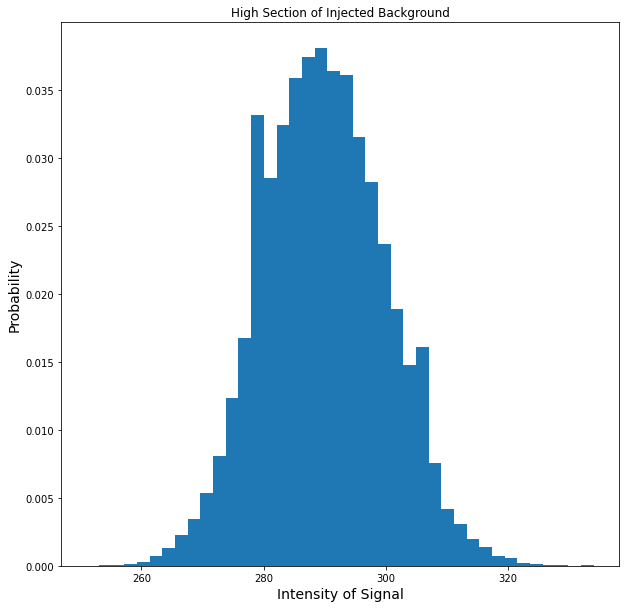

In [4]:
fig, ax = plt.subplots(1, 1, figsize = (10,10))

data.sort()
index = 0
for i in range(len(data)):
    if data[i] >= 180:
        index = i
        break
    
cut_data = data[index:]
ax.hist(cut_data, bins = 40, density = True)
ax.set_title("High Section of Injected Background")
ax.set_xlabel("Intensity of Signal", fontsize = 14)
ax.set_ylabel("Probability", fontsize = 14)
plt.show()

Above is the same histogram as before, but only the values above 180 (chosen arbitrarily as it is higher than the 5 sigma value, but lower than the injected 190 value). This looks more like a Poisson of high mean- relatively symmetric, unbiased, close to what the injection signal should look like.

# Problem 3

<ipython-input-5-dad048bdb5a1>:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(datacenters, signalcenters, Psd.T, cmap = 'jet')


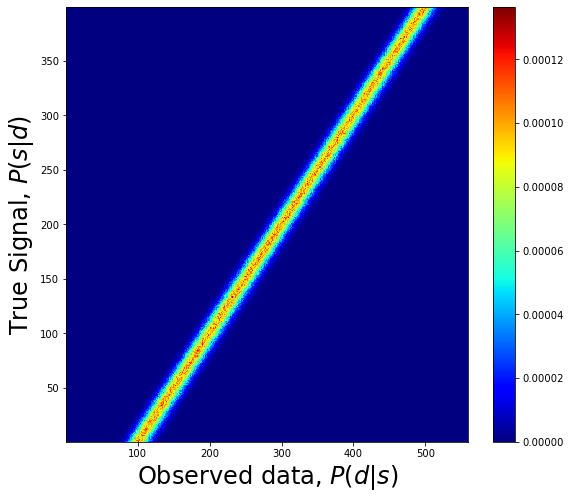

In [5]:
fig, ax = plt.subplots(1, 1, figsize = (9, 8))
# Maximum injection strength chosen arbitrarily as a number high above the 5 sigma value
strength = 400
signal = stats.uniform.rvs(loc = 0, scale = strength, size = 1000000)

data = bkgd + signal
signaledges = np.linspace(0, strength, strength)
dataedges = np.linspace(0, strength + 160, strength + 160)

#Psd stores an array of data to signal
Psd, temp, temp2 = np.histogram2d(data,signal, bins = [dataedges, signaledges], density = True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2

plt.pcolormesh(datacenters, signalcenters, Psd.T, cmap = 'jet')
plt.ylabel('True Signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.colorbar()
plt.show()

Above is a 2D histogram (color density plot) of the observed data and the true signal. For the above histogram, I injected a uniform signal from 0 to 400 (chosen arbitrarily as a high value above the 5 sigma significance for the background) and plotted it against the background. This shows the overlap of what you observe and what the true signal could be. Slices are taken and explained in more detail later.

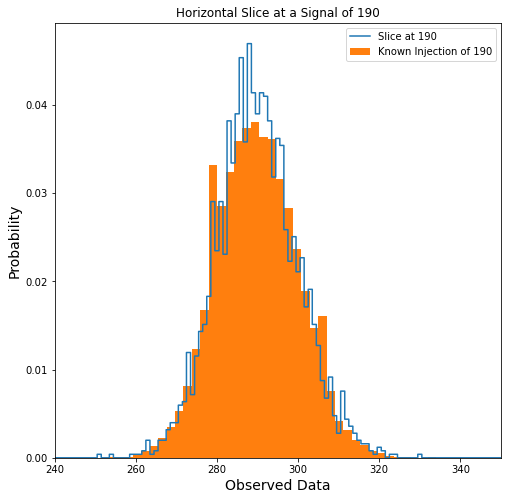

In [10]:
fig, ax = plt.subplots(1, 1, figsize = (8, 8))

lin = np.arange(0,strength + 160 - 1,1)
h_slice = Psd[:,190]
h_slice = h_slice / np.sum(h_slice)

ax.step(lin, h_slice, where = 'mid')
ax.hist(cut_data, bins = 40, density = True)
ax.set_title("Horizontal Slice at a Signal of 190")
ax.set_xlim(240, 350)
ax.set_xlabel("Observed Data", fontsize = 14)
ax.set_ylabel("Probability", fontsize = 14)
ax.legend(["Slice at 190", "Known Injection of 190"])

The above graph is of a horizontal slice at 190 true signal, with the (high section of the) histogram of a known injection signal of 190 plotted with it. The slice shows the probability of getting a specific observation if the true signal is 190. We can see that they line up relatively well, although with some distinctly different features. These features should be a product of the histogram binning rather than the actual data being different, although there is no way to prove this with only these graphs because the histogram must be binned where as the slice is a step plot between values.

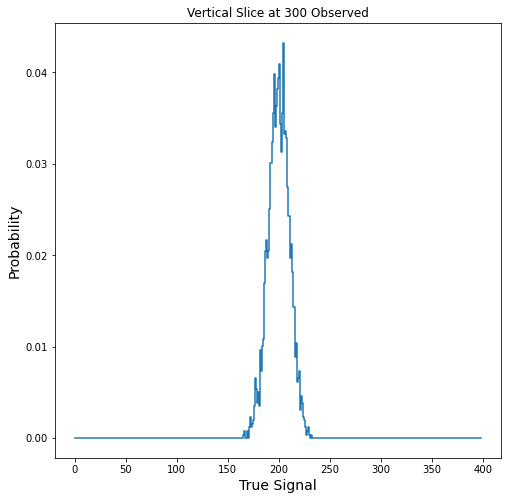

The 1 sigma uncertainty is from 190 to 210.


In [7]:
fig, ax = plt.subplots(1, 1, figsize = (8, 8))

obs = 300
v_slice = Psd[obs]
v_slice = v_slice / np.sum(v_slice)
lin = np.arange(0, strength - 1, 1)
ax.step(lin, v_slice, where = 'mid')
ax.set_title("Vertical Slice at 300 Observed")
ax.set_xlabel("True Signal", fontsize = 14)
ax.set_ylabel("Probability", fontsize = 14)
plt.show()

prob1sigma = stats.norm.cdf(1, loc = 0, scale = 1)

prob = 0
upper_index = 0
lower_index = 0
lower = False
for i in range(len(v_slice)):
    prob = prob + v_slice[i]
    if prob >= 1 - prob1sigma and lower == False:
        lower_index = i
        lower = True
    if prob >= prob1sigma:
        upper_index = i
        break
        

print("The 1 sigma uncertainty is from " + str(lower_index) + " to " + str(upper_index) + ".")

Above is a graph of a vertical slice taken at an observation of 300. This graph shows what the likelihood of your signal being a specific value would be if you observed data at 300. The 1 sigma uncertainty tells you what values you would be between with ~68% certainty, and for this graph the confidence intervals (using a 1 sigma uncertainty) are 200 $\pm$ 10. This is symmetric (and hence unbiased), which makes sense as Poissons go towards Gaussians when at high mean. 